# TP1 Régression lineaire

### Importation des librairies

In [196]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd


## III- Régression linéaire multiple avec l'algorithme de descente du gradient

### III-1. Lecture des données 

In [197]:
df = pd.read_csv('./house.txt')

### III-2. Conversion du txt vers csv

In [198]:
df.to_csv('./house.csv',index=False)
features=['area','bedrooms','floors','age','price']
house = pd.read_csv('./house.csv',names=features)
house.head()

,area,bedrooms,floors,age,price
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0


### III-3. extraction des features et du label

In [199]:
X=house.iloc[:,:4]   # diviser house data en X (features) et y (labels)
y=house.iloc[:,4]

In [200]:
X.head()

,area,bedrooms,floors,age
0,952.0,2.0,1.0,65.0
1,1244.0,3.0,1.0,64.0
2,1947.0,3.0,2.0,17.0
3,1725.0,3.0,2.0,42.0
4,1959.0,3.0,2.0,15.0


In [201]:
y.head()

0    271.5
1    300.0
2    509.8
3    394.0
4    540.0
Name: price, dtype: float64

### III-4. Division du dataset en données d'entrainement et données de test

In [202]:
X=np.array(X)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=0)


### II-5. La prédiction

Soit $X$ les données et $N$ le nombre de parametres du modèle de régression linéaire. 

On cherche à prédire: $$\hat{Y} = \sum\limits_{j=0}^{N} a_j X_j$$ avec $$X_0=1$$

Le but de l'algorithme de descente du gradient est de trouver les parametres \$a_j\$ qui minimisent la fonction coût
 

In [203]:
# todo

# Ecrire la fonction prédiction qui estime y_hat
def prediction(X,a):
  """
  Calculer  y_hat.
    
  Args:
    X (ndarray (n,)): Data, n examples 
    a               : model parameters  
  
  Returns
      y_hat
  """
  
  # retourne y_hat

  y_hat=np.dot(X, a)
  return y_hat

# testing of this function : 
X_t =np.array([[1., 5.],[1., 10.],[1., 8]])
theta_t = np.array([0.25,0.5])
a=prediction(X_t,theta_t)

print(X_t)
print(theta_t)
print(a)

[[ 1.  5.]
 [ 1. 10.]
 [ 1.  8.]]
[0.25 0.5 ]
[2.75 5.25 4.25]


### III-6. La fonction coût

La fonction du coût J est définie comme suit:

$$J =  \frac{1}{2n} \sum\limits_{i=1}^{n}(Y - \hat{Y})^2$$


In [204]:
#todo
#La fonction coût à minimiser est donnée par la formule suivante:



def J(X,Y,a):
    """
    Calculer  J.
     
    Args:
        X (ndarray):  n samples 
        Y (ndarray):  n Target labels   
        a  (ndarray):  p parameters models
           
     
    
    Returns
        J
    """

    y_hat = prediction(X, a)
    J = np.mean((Y - y_hat)**2) / 2
    return J

# Test de la fonction coût avec des données d'exemple
X_t = np.array([[1., 5.], [1., 10.], [1., 8.]])
theta_t = np.array([0.25, 0.5])
Y_t = np.array([3., 5., 4.5])
cost = J(X_t, Y_t, theta_t)
print(cost)
     

0.03125


### III-7. Calcul des dérivées partielles

On calcule les dérivées partielles ppur chaque parametre comme suit: 

$$\frac{\partial J}{\partial a_j} = \frac{\partial }{\partial a_j} \frac{1}{2n} \sum\limits_{i=1}^{n} (Y -\hat{Y})^2$$
 

$$\frac{\partial J}{\partial a_j} = \frac{1}{n} \sum\limits_{i=1}^{n} -(Y^{(i)} - \hat{Y}^{(i)})X_j^{(i)}$$  


In [205]:
#todo
# ecrire la fonction derivees qui calcule les dérivées partielles par rapport à chaque parametre du modèle
def derivees_partielles(X, Y, a):
  """
  Calculer  derivées paertielles.
    
  Args:
    X (ndarray : Data, n examples 
    Y (ndarray): Label, n labels   
    a          : model parameters  
  
  Returns
      derivees
  """
  
  erreur = (Y - prediction(X, a))

  # Calculer les dérivées partielles
  derivees = -(1 / len(Y)) * np.dot(X.T, erreur)

  return derivees 

# Test de la fonction dérivées avec des données d'exemple
X_t = np.array([[1., 5.], [1., 10.], [1., 8]])
theta_t = np.array([0.25, 0.5])
Y_t = np.array([3., 5., 4.5])
print("résultats:", derivees_partielles(X_t, Y_t, theta_t))

résultats: [-0.08333333 -0.25      ]


### III-8.  l'algorithme de descente de gradient

#### Types des algorithmes de descente de gradient
Il existe 3 types d'algorithmes de descente de gradient

##### 1- Descente de gradient par batch
   Tous les exemples sont pris en considération durant chaque itération. On prend la moyenne du gradient de tous les exemples et on utilise cette moyenne pour la mise à jour des paramètres. 

##### 2- Descente de gradient mini batch
  On utilise un batch constitué d’un nombre réduit de tous les exemples d’où le nom mini batch. Durant chaque itération, on choisit un mini batch, on calcule la moyenne du gradient de ce mini batch et on met à jour les paramètres du modèle . Pour la prochaine itération, on choisit un autre mini batch et ainsi de suite. 

##### 3- Descente de gradient stochastique
  Dans une itération, un exemple est choisi aléatoirement du dataset et le gradient de cet exemple est utilisé pour mettre à jour les paramètres du modèle. Dans la prochaine itération, un autre exemple est choisi et ainsi de suite. 


###  Vous allez implementer dans ce TP l'algorithme de descente de gradient par Batch

In [206]:
# initialisation des parametres
# a est un vecteur contenant les valeurs initiales des paramètres aj 
a = np.zeros(X_train.shape[1] + 1)
# alpha est le learning rate
alpha=0.01
#max_inter est le nombre max des itérations
max_iter=300

# todo 
#lancer l'algorithme de descente du gradient
def gradient_descent(X, Y, a,alpha,max_iter):
    
  """
  MAJ des parametres du modele
  Calcul de Cost 
  Args:
    X (ndarray : Data, n examples 
    Y (ndarray): Label, n labels   
    a          : model parameters  
    alpha: learning rate
    max_iter   : maxumum number of iterations
  
  
  Returns
      new_a, Cost
  """
  Costs = []  # pour sauvgarder Cost

  for _ in range(max_iter):
    # Calculate the cost
    Cost = J(X, Y, a)
    Costs.append(Cost)

    # Calculate the derivatives
    deriv = derivees_partielles(X, Y, a)

    # Define y_hat here
    y_hat = prediction(X, a)

    # Update the parameters
    a -= alpha * deriv

  return a, Costs


In [207]:
XX_train=np.c_[np.ones(X_train.shape[0]),X_train]
print(XX_train.shape)

y_train=np.array(y_train).reshape(-1,1)
print(X_train.shape,XX_train.shape,y_train.shape)

(66, 5)
(66, 4) (66, 5) (66, 1)


### III-6. régression lineaire multiple avec l'Algorithme de déscente du gradient

In [208]:
# [new_a,Cost]=gradient_descent(XX_train, y_train, a,alpha,4000)

###  L'algorithme ne marche pas.   Que faut t'il faire?

In [209]:
#todo

#normaliser les données 
Xnorm = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
Xnorm1 = np.c_[np.ones(Xnorm.shape[0]), Xnorm]
a = a.reshape(-1, 1)

[new_a,Cost]=gradient_descent(Xnorm1,y_train,a,alpha,1000)

### Afficher la courbe de la fonction coût en fonction des itérations

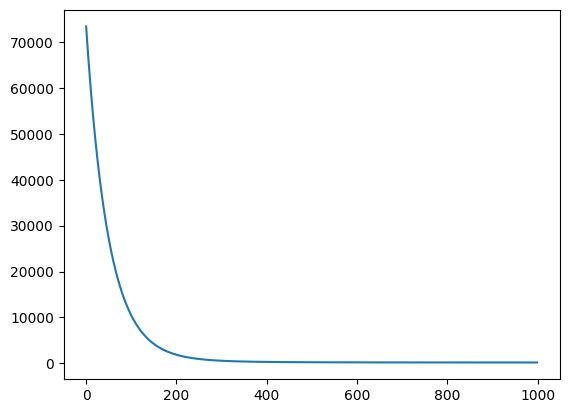

les parametres du modèle sont: [[369.40480922]
 [105.44836118]
 [-23.05477133]
 [-32.1589155 ]
 [-37.84306664]]


In [210]:
pl.plot(Cost)
pl.show()
print ("les parametres du modèle sont:", new_a)

###  Est ce que le nombre des itérations est bon? 
###  pourquoi?


In [211]:
# TODO : Tester d'autres valeurs du learning_rate :   0.1,   0.05,  0.01
a1, cost1=gradient_descent(Xnorm1,y_train,a,0.1,1000)
a2, cost2=gradient_descent(Xnorm1,y_train,a,0.05,1000)
a3, cost3=gradient_descent(Xnorm1,y_train,a,0.01,1000)


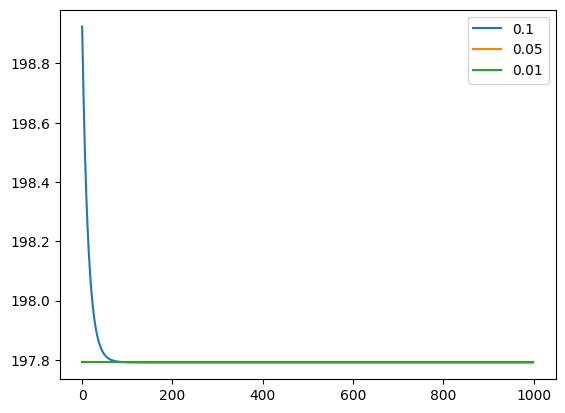

In [212]:
# todo
# Affichage des courbes des coûts pou chaque learning rate:
pl.plot(cost1, label="0.1")
pl.plot(cost2, label="0.05")
pl.plot(cost3, label = "0.01")
pl.legend()
pl.show()

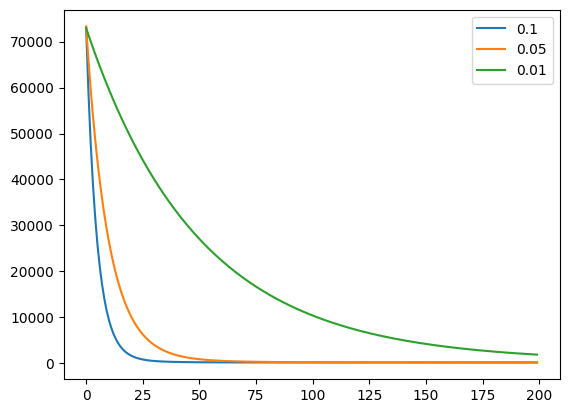

In [213]:
# todo
# tester une initialisation aléatoire, une initialisation à 1 pour le vecteur a en fixant le rate learning à 0.01 et le max_iteration à 200
# afficher les courbes des trois initialisations de a 

t1, couts1 = gradient_descent(Xnorm1, y_train, np.random.rand(Xnorm1.shape[1]).reshape(-1, 1), 0.1, 200)
t2, couts2 = gradient_descent(Xnorm1, y_train, np.random.rand(Xnorm1.shape[1]).reshape(-1, 1), 0.05, 200)
t3, couts3 = gradient_descent(Xnorm1, y_train, np.ones(Xnorm1.shape[1]).reshape(-1, 1), 0.01, 200)


pl.plot(couts1, label="0.1")
pl.plot(couts2, label="0.05")
pl.plot(couts3, label = "0.01")
pl.legend()
pl.show()


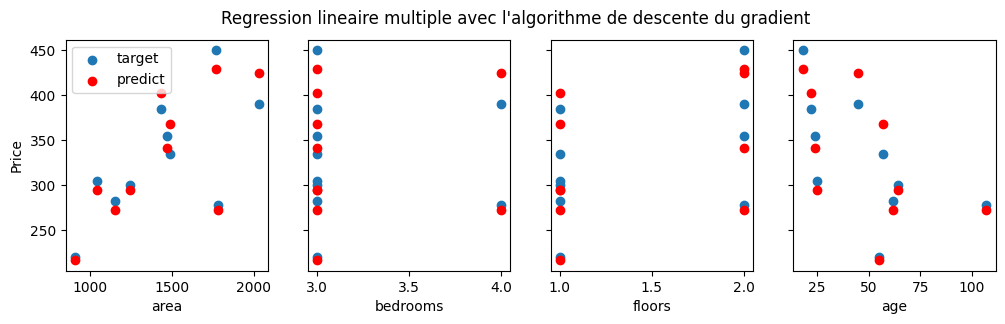

In [214]:
# plot predictions and targets vs original features 
   
# from sklearn.preprocessing import StandardScaler  # normalisation
# scaler = StandardScaler()
# X_norm = scaler.fit_transform(X_train)
# from sklearn.linear_model import SGDRegressor
# sgdr = SGDRegressor(max_iter=1000)
# sgdr.fit(X_norm, y_train.ravel())
# y_hat=sgdr.predict(X_norm)

y_hat=prediction(Xnorm1,a)


fig,ax=pl.subplots(1,4,figsize=(12,3),sharey=True)
X_train=np.array(X_train)


for i in range(len(ax)):
     
    ax[i].scatter(X_train[:10,i],y_train[:10], label = 'target')
    ax[i].set_xlabel(features[i])
    ax[i].scatter(X_train[:10,i],y_hat[:10],color='red', label = 'predict')

ax[0].set_ylabel("Price"); ax[0].legend()
fig.suptitle("Regression lineaire multiple avec l'algorithme de descente du gradient")
pl.show()

### III-9. régression lineaire multiple avec sklearn et Stochastic Gradient Descent Regressor

### III-9-1 Déterminsation du modèle de regression

In [215]:
from sklearn.preprocessing import StandardScaler  # normalisation
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_train)
from sklearn.linear_model import SGDRegressor
sgdr = SGDRegressor(max_iter=1000)

sgdr.fit(X_norm, y_train.ravel())
b = sgdr.intercept_
w = sgdr.coef_
print(f"model paraeters:                   w: {w}, b:{b}")


model paraeters:                   w: [106.97774928 -23.54088284 -33.2322357  -37.52723878], b:[369.43433629]


### III-6-2  Prédiction 

In [216]:
y_pred=sgdr.predict(X_norm)
print(f"Prediction sgd regression on training set:\n {sgdr.predict(X_norm)[:4]}" )
 
print(f"Target values \n {y_train[:4]}")
print(f"source values \n {X_train[:4]}")

Prediction sgd regression on training set:
 [367.83161429 216.65086803 429.08483531 341.83258474]
Target values 
 [[334. ]
 [219.8]
 [449.8]
 [354. ]]
source values 
 [[1.486e+03 3.000e+00 1.000e+00 5.700e+01]
 [9.040e+02 3.000e+00 1.000e+00 5.500e+01]
 [1.768e+03 3.000e+00 2.000e+00 1.800e+01]
 [1.470e+03 3.000e+00 2.000e+00 2.400e+01]]


In [217]:
# todo
# faire la prédiction sur le test set

y_pred2=prediction(Xnorm1,a)
print(f"Prediction of test regression on training set:\n {y_pred2.flatten()[:4]}" )
print(f"Prediction sgd regression on training set:\n {y_pred[:4]}" )
 
print(f"Target values \n {y_train[:4]}")
print(f"source values \n {X_train[:4]}")

Prediction of test regression on training set:
 [368.06733445 216.3226888  428.89537151 341.36787593]
Prediction sgd regression on training set:
 [367.83161429 216.65086803 429.08483531 341.83258474]
Target values 
 [[334. ]
 [219.8]
 [449.8]
 [354. ]]
source values 
 [[1.486e+03 3.000e+00 1.000e+00 5.700e+01]
 [9.040e+02 3.000e+00 1.000e+00 5.500e+01]
 [1.768e+03 3.000e+00 2.000e+00 1.800e+01]
 [1.470e+03 3.000e+00 2.000e+00 2.400e+01]]
